# Performance comparisons of spectral-cube and CASA #

## Authors ##
[Eric Koch](https://github.com/e-koch), [Adam Ginsburg](https://github.com/keflavich), [Tom Robitaille](https://github.com/astrofrog)

## Summary ##

This tutorial compares the performance of common operations in spectral-cube and CASA. This provides an idea for which operaitons in the respective packages are well optimized. The goal is also to explore how to produce equivalent comparisons since the package use different methods to parallelize operations.

FINISH THIS SECTION

## Keywords ##

radio astronomy, spectral-line data cubes, CASA

## Requires ##

*NOTE: this tutorial requires CASA 6.1 to be installed.*

The bokeh plotting package is also required to explore dask diagnostics.

```
pip install astropy
pip install spectral-cube
pip install radio-beam
pip install dask
pip install aplpy
pip install --index-url https://casa-pip.nrao.edu/repository/pypi-casa-release/simple casatools
pip install --index-url https://casa-pip.nrao.edu/repository/pypi-casa-release/simple casatasks
pip install bokeh
```


In [1]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
from spectral_cube import SpectralCube
import astropy.units as u
from astropy.io import fits

from dask.diagnostics import ProgressBar

pbar = ProgressBar()
pbar.register()

In [3]:
from bokeh.io import output_notebook

output_notebook()

Loading BokehJS ...

In [25]:
from dask.diagnostics import visualize, Profiler, ResourceProfiler, CacheProfiler

In [26]:
# cube = SpectralCube.read("/home/ekoch/storage/M31/HI/full_imaging_wEBHIS/M31_14A_HI_contsub_width_04kms.image.pbcor.EBHIS_feathered.fits", use_dask=True) 

cube = SpectralCube.read("/home/ekoch/storage/M33/NOEMA/imaging/M33_ARM05_dirty.image.pbcor.fits", use_dask=True) 


In [27]:
cube

DaskSpectralCube with shape=(179, 700, 1024) and unit=Jy / beam and chunk size (179, 350, 256):
 n_x:   1024  type_x: RA---SIN  unit_x: deg    range:    23.355329 deg:   23.421327 deg
 n_y:    700  type_y: DEC--SIN  unit_y: deg    range:    30.515751 deg:   30.554585 deg
 n_s:    179  type_s: VRAD      unit_s: m / s  range:  -169500.000 m / s:  -80500.000 m / s

In [28]:
# Try running with difference numbers of works
from time import time

nworkers = [1, 2, 4, 6, 8]
times = []

for nwork in nworkers:

    print(f"N workers {nwork}")
    with cube.use_dask_scheduler('threads', num_workers=nwork):

        with Profiler() as prof, ResourceProfiler(dt=0.5) as rprof, CacheProfiler() as cprof:

            t0 = time()
            # moment0 = cube.moment0()
            # out = cube.sum()
            out = cube.mean()
            t1 = time()

            times.append(t1 - t0)

        visualize([prof, rprof, cprof])

N workers 1
[########################################] | 100% Completed |  2.6s
[########################################] | 100% Completed |  2.6s


N workers 2
[########################################] | 100% Completed |  2.2s
[########################################] | 100% Completed |  2.3s


N workers 4
[########################################] | 100% Completed |  3.2s
[########################################] | 100% Completed |  3.3s


N workers 6
[########################################] | 100% Completed |  2.0s
[########################################] | 100% Completed |  2.0s


N workers 8
[########################################] | 100% Completed |  3.4s
[########################################] | 100% Completed |  3.5s


In [29]:
%matplotlib inline

Text(0.5, 0, 'N threads')

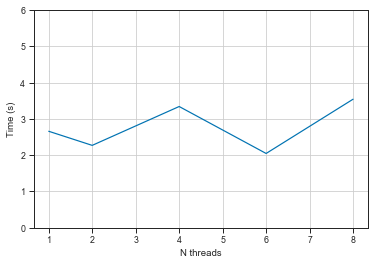

In [30]:

plt.plot(nworkers, times)
plt.ylim([0, 6])
plt.grid()
plt.ylabel("Time (s)")
plt.xlabel("N threads")